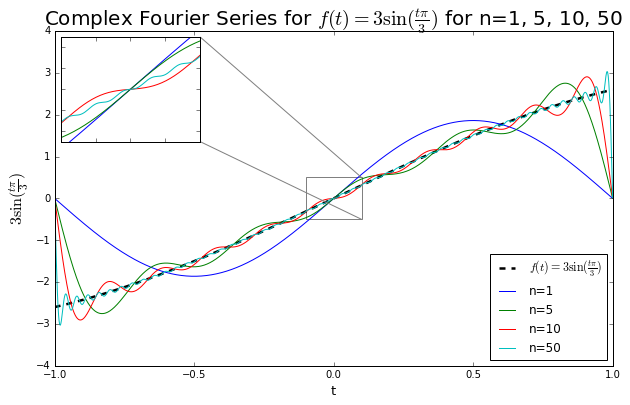

In [106]:
import numpy as np
import matplotlib.pyplot as plt
from mpl_toolkits.axes_grid1.inset_locator import zoomed_inset_axes as zoom
from mpl_toolkits.axes_grid1.inset_locator import mark_inset

def main_1(n):
    """executes functions for part (a) of problem 1"""
    def c_n1(n):
        """Finds constants for n terms"""
        #sum = 0
        #for i in range(-n, n+1):
        return (((-1)**n)*27*np.sqrt(3)*n) / (2*np.pi*(1-9*(n**2))) 
    
    def f_n1(n, func):
        """function values using constant c_n values"""
        lmbda = 2
        x = 1
        ranj = int(2*x)
        t_steps = 1000
        delta_t = ranj / t_steps
        f_t_values = np.zeros((t_steps))
        t = np.linspace(-x, x, t_steps)
        #print(t) # for testing
        
        for num in t:
            sum = 0
            for i in range(-n, n+1):
                k_n = (2*np.pi*i) / lmbda
                sum += np.sin(k_n*num)*func(i)
            item_index = np.where(t==num)
            f_t_values[item_index] = sum
        
        return f_t_values, t
    
    def plot(t, f_t_values, n):
        """plots f_t function over interval t"""
        plt.plot(t, f_t_values, label=r"n={0}".format(n))
    
    f_t_values, t = f_n1(n, c_n1)
    #plot(t, f_t_values, n)
    #print(f_t_values.shape) # for testing
    #print(t.shape) # for testing
    return f_t_values, t, n

def part_a():
    """executes all functions for part (a)"""
    fig1 = plt.figure()
    plt.title(r"Complex Fourier Series for $f(t)=3\sin(\frac{t\pi}{3})$ for n=1, 5, 10, 50", 
              fontsize="20")
    
    # resizing graph
    fig_size = plt.rcParams["figure.figsize"]
    fig_size[0] = 10
    fig_size[1] = 6
    plt.rcParams["figure.figsize"] = fig_size

    f_t_values1, t, n1 = main_1(1)
    f_t_values2, t, n2 = main_1(5)
    f_t_values3, t, n3 = main_1(10)
    f_t_values4, t, n4 = main_1(50)
    
    actual_f_t = np.zeros_like(t)
    for num in t:
        i = 3*np.sin((np.pi*num) / 3)
        item_index = np.where(t==num)
        actual_f_t[item_index] = i
     
    ax1 = fig1.add_subplot(111)
    ax1.plot(t, actual_f_t, 'k--', linewidth="2.5", label=r"$f(t)=3\sin(\frac{t\pi}{3})$")
    ax1.plot(t, f_t_values1, label=r"n={0}".format(n1))
    ax1.plot(t, f_t_values2, label=r"n={0}".format(n2))
    ax1.plot(t, f_t_values3, label=r"n={0}".format(n3))
    ax1.plot(t, f_t_values4, label=r"n={0}".format(n4))
    ax1.legend(loc=4)
    plt.xlabel("t", fontsize="13")
    plt.ylabel(r"$3\sin(\frac{t\pi}{3})$", fontsize="16")
    
    # for smaller zoomed plot, can remove if we want.  Only there for extra detail
    ax_inset = zoom(ax1, 2.5, loc=2)
    ax_inset.plot(t, f_t_values1)
    ax_inset.plot(t, f_t_values2)
    ax_inset.plot(t, f_t_values3)
    ax_inset.plot(t, f_t_values4)
    x1, x2, y1, y2 = -0.1, 0.1, -0.5, 0.5
    ax_inset.set_xlim(x1, x2) 
    ax_inset.set_ylim(y1, y2)
    plt.yticks(visible=False)
    plt.xticks(visible=False)
    mark_inset(ax1, ax_inset, loc1=1, loc2=4, fc="none", ec="0.5")

    
# this will go at end of program
if __name__ == '__main__':
    part_a()
    #part_b()
    #part_c()